In [59]:
from subprocess import Popen

In [88]:
path = '/Users/bmmorris/git/orso'
cmd = ['python', 'ensemble.py', '10']
n_threads = 8

for i in range(n_threads):
    Popen(cmd, cwd=path)

In [91]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

half_max_paths = glob('data/half_solar_max/residuals_*')
max_paths = glob('data/solar_max/residuals_*')
more_max_paths = glob('data/1400/residuals_*')

half_max_residuals = []
for path in half_max_paths:     
    half_max_residuals.append(np.load(path))

max_residuals = []
for path in max_paths:     
    max_residuals.append(np.load(path))

more_max_residuals = []
for path in more_max_paths:     
    more_max_residuals.append(np.load(path))
    
half_max_residuals = np.concatenate(half_max_residuals)
max_residuals = np.concatenate(max_residuals)
more_max_residuals = np.concatenate(more_max_residuals)

Text(0.5, 0, 'Maximum Residual [ppm]')

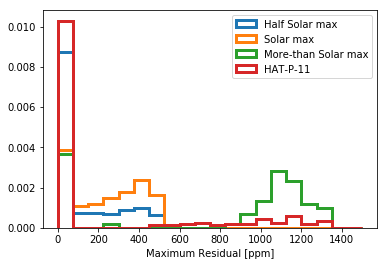

In [99]:
hat11 = np.load('data/hat11_residuals.npy')
histprops = dict(density=True, histtype='step', lw=3, range=[0, 1500])
plt.hist(half_max_residuals * 1e6, 20, label='Half Solar max', **histprops);
plt.hist(max_residuals * 1e6, 20, label='Solar max', **histprops);
plt.hist(more_max_residuals * 1e6, 20, label='More-than Solar max', **histprops);
plt.hist(hat11 * 1e6, 20, label='HAT-P-11', **histprops)

plt.legend()
plt.xlabel('Maximum Residual [ppm]')
# plt.ylim([0, 0.005])